# Creating a car brand classifier using RESNET 50 


## Importing the libraries

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

##Train test split


Taking the size of the image as 224 by 224 pixels

In [ ]:
IMAGE_SIZE=[224,224]

valid_path='/content/drive/MyDrive/ML and deep learning projects/Car classifier/Datasets/Datasets/Test'
train_path='/content/drive/MyDrive/ML and deep learning projects/Car classifier/Datasets/Datasets/Train'

Importing the resnet 50 and adding the preproseesing layer to the front 
of the VGG
Here we are using imagenet weights

Images are basically in 3 channels ,so we put input size as IMAGE_SIZE+[3]

In [ ]:
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],
                weights='imagenet',include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Dont train exisiting weights

In [ ]:
for layer in resnet.layers:
  layer.trainable=False

To get the number of classes
That is the number of output categories



In [ ]:
folders=glob('/content/drive/MyDrive/ML and deep learning projects/Car classifier/Datasets/Datasets/Train/*')
folders

['/content/drive/MyDrive/ML and deep learning projects/Car classifier/Datasets/Datasets/Train/audi',
 '/content/drive/MyDrive/ML and deep learning projects/Car classifier/Datasets/Datasets/Train/lamborghini',
 '/content/drive/MyDrive/ML and deep learning projects/Car classifier/Datasets/Datasets/Train/mercedes']

Flatten the layer

In [ ]:
x=Flatten()(resnet.output)

In [ ]:
prediction=Dense(len(folders),activation='softmax')(x)

Creating the model

In [ ]:
model=Model(inputs=resnet.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In the above summary we can see that the last layer
has been added with 3 categories

#Now compiling the model

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Augumenting the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1/255)

Generating the training and testing set

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/ML and deep learning projects/Car classifier/Datasets/Datasets/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')



Found 64 images belonging to 3 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/ML and deep learning projects/Car classifier/Datasets/Datasets/Test',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')



Found 58 images belonging to 3 classes.


#Fitting the model

In [ ]:
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)

)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 73s 40s/step - loss: 3.8380 - accuracy: 0.3438 - val_loss: 18.9437 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 710ms/step - loss: 12.1044 - accuracy: 0.3906 - val_loss: 12.1345 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 1s 726ms/step - loss: 6.2624 - accuracy: 0.3594 - val_loss: 1.8517 - val_accuracy: 0.1724
Epoch 4/50
2/2 [==============================] - 1s 694ms/step - loss: 3.7869 - accuracy: 0.2812 - val_loss: 4.1333 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 1s 701ms/step - loss: 5.7718 - accuracy: 0.4062 - val_loss: 5.1589 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 1s 696ms/step - loss: 6.6983 - accuracy: 0.3906 - val_loss: 2.9647 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 1s 696ms/step - loss: 2.6186 - accuracy: 0.4375 - val_loss: 1.9185 - val_accuracy: 0.5000
Epoch 8/50
2/2 [==

Plotting the errors


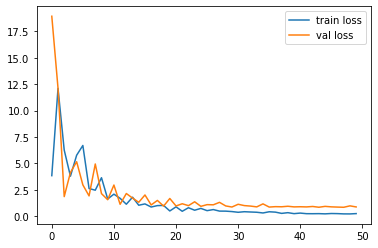

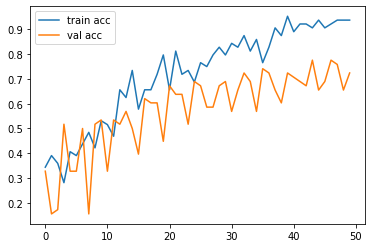

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Now saving the model

In [ ]:
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

#Predicting of test data

In [ ]:
y_pred=model.predict(test_set)
y_pred

2/2 [==============================] - 1s 115ms/step


array([[9.31158476e-03, 5.40665030e-01, 4.50023413e-01],
       [7.55674303e-01, 2.40203053e-01, 4.12267307e-03],
       [1.37097826e-02, 9.27411556e-01, 5.88786192e-02],
       [3.18552017e-01, 8.74972343e-02, 5.93950808e-01],
       [2.88318783e-01, 4.15665358e-01, 2.96015829e-01],
       [1.16943508e-01, 4.77603197e-01, 4.05453354e-01],
       [4.91033718e-02, 9.26879406e-01, 2.40172446e-02],
       [1.37501270e-01, 8.14446330e-01, 4.80524451e-02],
       [1.33524025e-02, 2.39361256e-01, 7.47286320e-01],
       [3.30739804e-02, 1.56504307e-02, 9.51275587e-01],
       [4.70970618e-03, 3.91248286e-01, 6.04041994e-01],
       [5.07303536e-01, 3.65926385e-01, 1.26770079e-01],
       [4.22269568e-06, 2.20363727e-03, 9.97792125e-01],
       [4.11565378e-02, 2.43164226e-02, 9.34527040e-01],
       [1.78341977e-02, 7.59946764e-01, 2.22219065e-01],
       [2.61508077e-02, 4.04323218e-03, 9.69805956e-01],
       [9.76984120e-06, 6.47324603e-04, 9.99342859e-01],
       [2.00648624e-02, 1.07405

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/ML and deep learning projects/Car classifier/Datasets/Datasets/Test/lamborghini/10.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)


1/1 [==============================] - 2s 2s/step


array([[0.01871351, 0.6420961 , 0.3391904 ]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
a==1

array([ True])